<a href="https://colab.research.google.com/github/Kaushal-Top5699/tensorflow_cnn_cv/blob/main/tensorflow_cnn_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Networks and Computer Vision with TensorFlow**



In [ ]:
import tensorflow as tf
import zipfile
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip
zip_ref = zipfile.ZipFile("/content/pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-04-11 01:21:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   129MB/s    in 0.8s    

2023-04-11 01:21:28 (129 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## **Inspect Data**

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

In [ ]:
# Walk through pizza steak directory and list number of files.
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Apr 11 01:21 .
drwxr-xr-x 1 root root 4096 Apr 11 01:21 ..
drwxr-xr-x 4 root root 4096 Apr 11 01:21 test
drwxr-xr-x 4 root root 4096 Apr 11 01:21 train


In [ ]:
# Another way to find out how many images in the file.
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
# Get class names programmatically.
import pathlib
import matplotlib.image as mpimg
import random

In [ ]:
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
# Lets visualize our images.
def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get a random image path.
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read the image and plot it.
  image = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape: {image.shape}")
  return image

['101312.jpg']
Image Shape: (343, 512, 3)


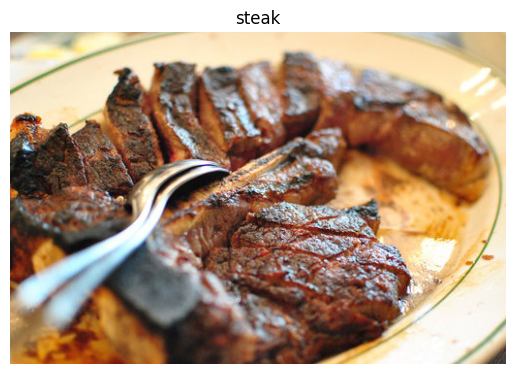

In [ ]:
# View a random image from training
steak_image = view_random_image("pizza_steak/train/", "steak")

['3663580.jpg']
Image Shape: (512, 512, 3)


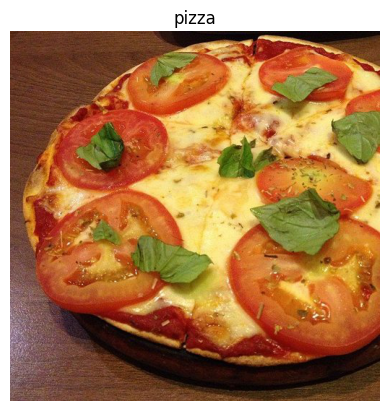

In [ ]:
pizza_image = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
# We can covert these images into Tensors.
tf.constant(pizza_image[0])

<tf.Tensor: shape=(512, 3), dtype=uint8, numpy=
array([[92, 46, 23],
       [96, 50, 27],
       [87, 42, 21],
       ...,
       [13,  8, 14],
       [15, 10, 16],
       [16, 11, 17]], dtype=uint8)>

In [15]:
pizza_image.shape # Returns width, hight and color channels.

(512, 512, 3)

### **Few things to do first**

1. Tensorflow understands number and images.
2. Make sure tensors are of right shape.
3. Scaling of data (Normalise or Standardise) that is, getting all the values in tensors between 0 and 1. We do it by dividing pixel values by 255, because that's the max size of a pixel.

Lets build the Convolutional Neural Network to find patterns in our images.

1. Load our images.
2. Preprocess our images (getting into tensor format).
3. Build our CNN to find patterns in our images.
4. Compile the CNN.
5. Fit the CNN to our training data.


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
tf.random.set_seed(42)

# Preprocess Data (get all of pixel values between 0 and 1), this is scaling or normalising.
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories.
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches.
train_data = train_datagen.flow_from_directory(directory = train_dir, 
                                               batch_size = 32, 
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

# Build CNN model (same as tiny VGG on the CNN explainer website).
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu", input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D((2, 2), padding = "valid"),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")                                                             
])

# Compile our CNN.
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
# Fit the model.
history = model_1.fit(train_data, 
                      epochs = 5, 
                      steps_per_epoch = len(train_data), 
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 22s 207ms/step - loss: 0.5568 - accuracy: 0.7060 - val_loss: 0.5341 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4278 - accuracy: 0.8047 - val_loss: 0.3441 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4018 - accuracy: 0.8180 - val_loss: 0.3277 - val_accuracy: 0.8800
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3779 - accuracy: 0.8340 - val_loss: 0.3440 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3505 - accuracy: 0.8567 - val_loss: 0.3483 - val_accuracy: 0.8480


**We switched to GPUs to run these epochs faster.**

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [20]:
# Model without CNN.
tf.random.set_seed(42)

# Model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [21]:
history_2 = model_2.fit(train_data, 
            epochs = 5, 
            steps_per_epoch = len(train_data), 
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 196ms/step - loss: 1.3245 - accuracy: 0.4807 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [22]:
# Model without CNN with slight improvements.
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [23]:
history_3 = model_3.fit(train_data, 
                        epochs = 5, 
                        steps_per_epoch = len(train_data), 
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 196ms/step - loss: 5.3836 - accuracy: 0.6073 - val_loss: 1.0183 - val_accuracy: 0.6860
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 1.0866 - accuracy: 0.6887 - val_loss: 0.5908 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.7115 - accuracy: 0.7407 - val_loss: 1.7627 - val_accuracy: 0.5040
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6524 - accuracy: 0.7440 - val_loss: 0.6109 - val_accuracy: 0.7040
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.7391 - accuracy: 0.7080 - val_loss: 0.5275 - val_accuracy: 0.7840


In [24]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


### As you can the total parameters in CNN were 31K and without CNN improved model_3 has a total of 15 million parameters, this shows how powerful CNN is.

## Breaking down our binary classification model.

1. Become one with Data (Visualize).
2. Preprocess the data (Scaling/Normalising).
3. Create a model.
4. Fit the model.
5. Evaluate the model.
6. Adjust different parameters and try to improve the model.
7. Repeat until satisfied.

['179293.jpg']
Image Shape: (384, 512, 3)
['3479875.jpg']
Image Shape: (512, 512, 3)


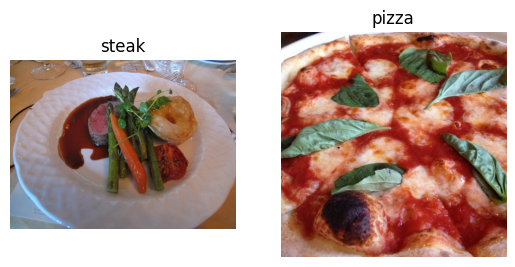

In [25]:
# Become one with data.
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [26]:
# Preprocessing the data (getting it ready for the model).
# Define directory dataset paths.
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

### Next step is to turn our data into **batches**.

Instead of looking at all the 10k images in our dataset, the model could look at only 32 at a time. Therefore, the default batch_size is always 32.

The reason for this is:

1. 10,000 images or more might not fit into the computer's processor (GPU).
2. Trying to fit in 10,000 images at once might not help our model to learn very well.
 

In [27]:
# Create train and test data generators and rescale the data.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/225.)
test_datagen = ImageDataGenerator(rescale = 1/225.)
# Getting all tensor values between 0 and 1.

In [28]:
# Load in our images from directories and turn them into batches.
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size = (224, 224),
                                              class_mode = "binary",
                                              batch_size = 32)

test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size = (224, 224),
                                              class_mode = "binary",
                                              batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
# Get sample of train data batch.
images, labels = train_data.next() # Gets the next batch of images and labels of train_data
len(images), len(labels) 

(32, 32)

In [30]:
# How many batches in data?
len(train_data)

47

A total of 47 batches (1500/32)

In [31]:
1500/32

46.875

In [ ]:
# Get the first two images.
images[:2], images[0].shape

In [33]:
# Get the first batch of labels.
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### **Let's start by creating a simple CNN model, without pooling.**

In [34]:
# Model 4
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, # Filter is number of sliding windows going across the input.
                           (3, 3), # Size of sliding window.
                           strides = (1, 1), # Size of step the sliding window taks on input.
                           padding = "valid", # If valid it compresses the image, and if same it keeps the input in the original shape.
                           activation = "relu", 
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.Conv2D(10, (3, 3), activation = "relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [35]:
 model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [36]:
history_4 = model_4.fit(train_data, 
                        epochs = 5, 
                        steps_per_epoch = len(train_data), 
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 200ms/step - loss: 0.8490 - accuracy: 0.6860 - val_loss: 0.4469 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4343 - accuracy: 0.8147 - val_loss: 0.3824 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3427 - accuracy: 0.8660 - val_loss: 0.3374 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.1989 - accuracy: 0.9420 - val_loss: 0.3718 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.1175 - accuracy: 0.9700 - val_loss: 0.4841 - val_accuracy: 0.7840


### **5. Evaluating our model.**

<Axes: >

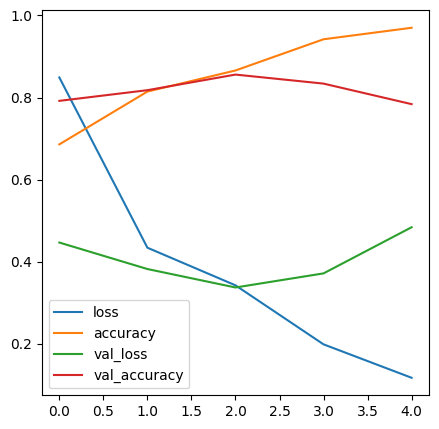

In [38]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize = (5, 5))

In [42]:
# Plotting validation and training curves seperatly.
def plot_loss_curve(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"])) # How many epochs did we run for?

  # Plot loss.
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy.
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

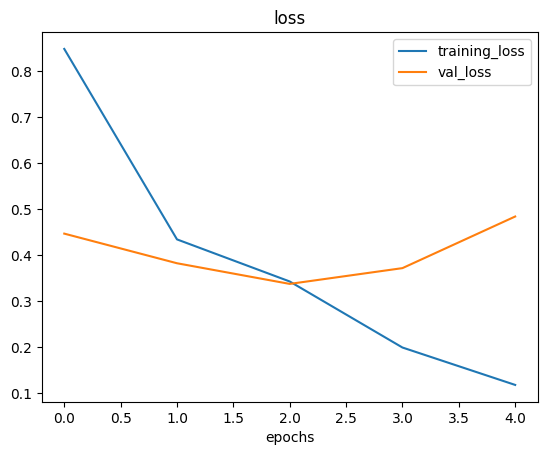

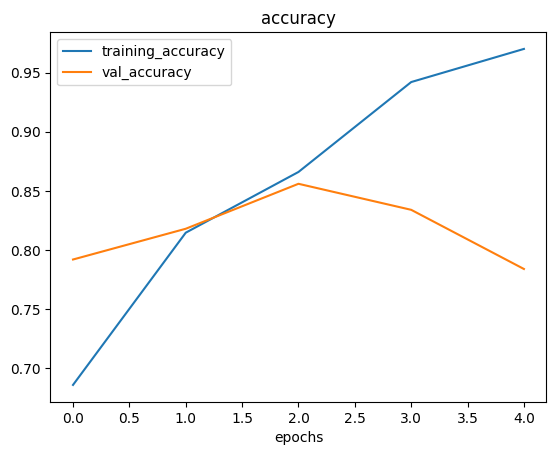

In [43]:
# Checkout the loss and accuracy of model_4.
plot_loss_curve(history_4)